# Exercise 1.3

Assume that the DC motor described in {ref}`ref:lec1:ex2` is controlled by a **Proportional (P)** controller.

1. Sketch the block diagram of the control system. Determine how the poles of the closed-loop depend on the proportional gain $K$, and discuss what this means for the behavior of the closed-loop.
2. Consider two reference signals, a step $\theta_{ref}(t) = \textrm{step}(t)$ and a ramp $\theta_{ref}(t) = \textrm{ramp}(t)$. What is the steady-state controll error (or output tracking error) in these two cases?
3. Consider now a **Proportional Integral (PI)** controller. What will the steady-state error be if the reference signal is a ramp?

---

## Solution

As shown in {ref}`ref:lec1:ex1`, the transfer function of the motor is

$$
G(s) = \frac{k_o}{s(s+\alpha)}
$$

The open-loop transfer function is defined as

$$
G_o(s) = \frac{\Theta(s)}{\Theta_{ref}(s)} = F(s) \cdot G(s)
$$

where $\Theta_{ref}(s)$ is the reference signal, and $F(s)$ is the controller.

We now compute the **closed-loop transfer function** as

$$
    \Theta(s) = G(s) F(s) \underbrace{(\Theta_{ref}(s) - \Theta(s))}_{\text{Error $E(s)$}} \quad \Rightarrow \quad \Theta(s) = \frac{F(s)G(s)}{1 + F(s) G(s)} \Theta_{ref}(s) = \frac{G_o(s)}{1+G_o(s)} \Theta_{ref}(s)
$$

### Question 1


We start by considering a proportional controller, $F(s) = K$, where **$K$ is the proportional gain**.

In this case, the closed loop transfer function is

$$
G_{c}(s) = \frac{K \cdot \frac{k_o}{s(s+\alpha)}}{1+K \cdot \frac{k_o}{s(s+\alpha)}} = \frac{k_o K}{s^2 + \alpha s +k_o K}
$$

The closed-loop poles are the poles of $G_c(s)$. We hence need to find the roots of the denominator of $G_c(s)$:

$$
s^2 + \alpha s + k_o K = 0
$$

We solve this equation by $s$. The discriminant is $\Delta = {\alpha^2 - 4 k_o K}$.

Now, there are two relevant cases.

#### Case $\Delta \geq 0$ 

When $K < \frac{\alpha^2}{4 k_o}$ the discriminant is positive, which means that there exist **two real poles**:

$$
s = \frac{-\alpha  \pm \sqrt{\Delta}}{2}
$$

These poles are stable as long as both of them are strictly negative. 

- $- \alpha - \sqrt{\Delta} < 0 \quad \rightarrow \quad  \sqrt{\Delta} > -\alpha$
- $- \alpha + \sqrt{\Delta} < 0 \quad \rightarrow \quad  \sqrt{\Delta} < \alpha$



The first is always satisfied as long as $\Delta \geq 0$. 
When it comes to the second one, under the condition $\Delta \geq 0$ we can square both sides since $\alpha > 0$.

This way, we get the following system of inequalities

$$
\begin{dcases}
    K \leq \frac{\alpha^2}{4 k_o} \\
    \alpha^2 - 4 k_o K < \alpha^2
\end{dcases} \,\, \Rightarrow \,\, \begin{dcases}
    K \leq \frac{\alpha^2}{4 k_o} \\
     K > 0
\end{dcases} \,\, \Rightarrow \,\, 0 < K \leq \frac{\alpha^2}{4 k_o}
$$

#### Case $\Delta < 0$

When $K > \frac{\alpha^2}{4 k_o}$ the discriminant is negative, which means that we have two complex conjugate poles.

In this case, it is easy to notice that

$$
    s = -\frac{\alpha}{2} \pm i \frac{\sqrt{\lvert \Delta \lvert}}{2}
$$

In this case the real part of these eigenvalues is $-\frac{\alpha}{2} < 0$ regardless of $K$. Therefore, any $K > \frac{\alpha^2}{4 k_o}$ makes the closed-loop stable.

#### Solution to Question 1
The overall solution is given by the union of the solutions in the two cases:

$$ 
 \left\{ K \geq \frac{\alpha^2}{4 k_o} \cup K < \frac{\alpha^2}{4 k_o} \right\} = {K > 0}
$$

```{note}
An alternative (and faster) approach to solve the problem would be to use the so-called Routh criterion!
```

Finally, we can visualize how the closed-loop poles move in the complex plane as a function of $K$ by inspecting the root locus. We will plot the root locus with MATLAB assuming $k_o = 1$ and $\alpha=1$.

In [1]:
% Check if we are running in Octave or MATLAB
if exist('OCTAVE_VERSION', 'builtin')
    pkg load control; warning('off', 'all');
    if isempty(getenv('BINDER_SERVICE_HOST')); t = 'notebook'; else; t = 'plotly'; end
    graphics_toolkit(t);
end

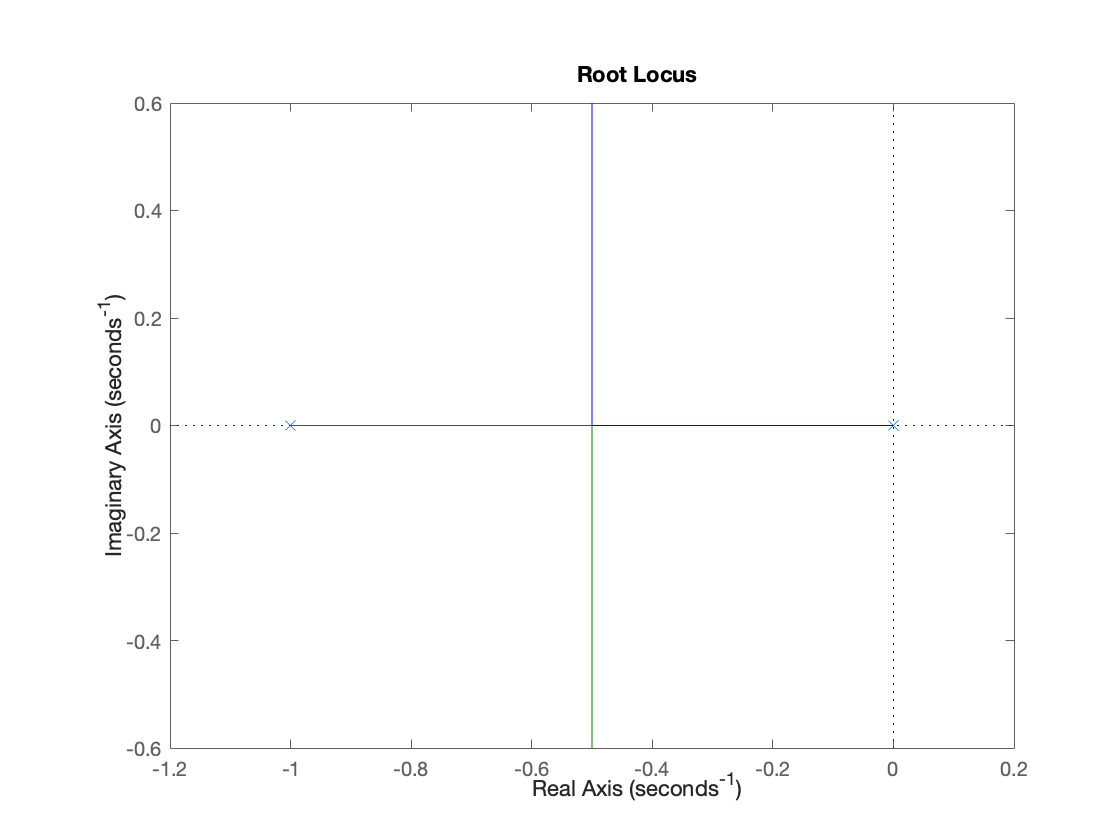

In [5]:
s = tf('s');
G = 1/(s*(s+1));
rlocusplot(G)

As one can see from the plot above, for every $K > 0$ the closed-loop eigenvalues have negative real part.

### Question 2

Recalling that $\Theta(s) = G_c(s) \Theta_{ref}(s)$, where $G_c(s)$ is the closed-loop transfer function,  since we have verified that $G_c(s) = \frac{k_o K}{s^2 + \alpha s + k_o K}$ is stable for any $K > 0$, we can apply the Final Value Theorem.

According to the Final Value Theorem,

$$
\lim_{t \to \infty} \theta(t) = \lim_{s \to 0} s G_c(s) \Theta_{ref}(s)
$$

From this, the final error is

$$
\lim_{t \to \infty} e(t) = \lim_{t \to \infty} \theta_{ref}(t)  - \lim_{t \to \infty} \theta(t) = \lim_{s \to 0} s\left[ 1 -  G_c(s) \right] \Theta_{ref}(s)

#### Case $\theta_{ref}(t) = \textrm{step}(t)$

$$
e(\infty) = \lim_{s\to 0} \cancel{s} \left[ 1 - \frac{k_o K}{s^2 + \alpha s + k_o K} \right] \frac{1}{\cancel{s}} = \lim_{s\to 0} \frac{s^2 + \alpha s}{s^2 + \alpha s + k_o K} = 0
$$

#### Case $\theta_{ref}(t) = \textrm{ramp}(t)$

$$
e(\infty) = \lim_{s\to 0} \cancel{s} \left[ 1 - \frac{k_o K}{s^2 + \alpha s + k_o K} \right] \frac{1}{s^{\cancel{2}}} = \lim_{s\to 0} \frac{s^2 + \alpha s}{s^2 + \alpha s + k_o K} \frac{1}{s} = \frac{\alpha}{k_o K} \neq 0
$$

### Question 3

We now consider the case where we have a PI controller:

$$
F(s) = \frac{k_i}{s} + k_p = \frac{k_p s + k_i}{s}
$$

where $k_p$ is the proportional gain and $k_i$ is the integral gain. The closed-loop transfer function becomes

$$
\begin{aligned}
G_c(s) =& \frac{F(s) G(s)}{1 + F(s) G(s)} \\
=& \frac{(k_p s + k_i) k_o}{s^2(s+\alpha) + k_o (k_p s + k_i)}\\
=& \frac{(k_p s + k_i) k_o}{s^3 + \alpha s^2  + k_o k_p s + k_o k_i}
\end{aligned}
$$


**Assuming that $G_c(s)$ is stable**, i.e. $k_p$ and $k_i$ are designed so that all the roots of $s^3 + \alpha s^2 + k_o k_p s + k_o k_i = 0$ have negative real part[^assumption], then we can apply the Final Value theorem.

$$
e(\infty) = \lim_{s \to 0} s \left[ 1 -  \frac{(k_p s + k_i) k_o}{s^3 + \alpha s^2  + k_o k_p s + k_o k_i} \right] \frac{1}{s^2} = \lim_{s \to 0} \frac{s^3 + \alpha s^2}{s^3 + \alpha s^2  + k_o k_p s + k_o k_i} \frac{1}{s} = 0
$$

---

[^assumption]: $k_p$ and $k_i$ can be designed either with the Routh criterion or with the rootlocus. 